
# Assignment 4: Diffusion 
For this assignment, you will be using colab. 
 
Please complete and submit this assignment by April 9, 11:59 PM. Download and submit 
the .ipynb file and share the notebook with the TA (swetha.sirnam@ucf.edu and 
swethacrcv@gmail.com) 

### Useful Resources: 
 
**PyTorch Colab Documentation:** 
https://pytorch.org/tutorials/beginner/colab.html 
 
**HuggingFace Sample Notebooks:** 
https://huggingface.co/docs/transformers/en/notebooks 
 
**Stable Diffusion v1.5 (SDv1.5)** 
Model Doc/Weights: https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5
 
**Kandinsky** 
Model Doc: https://huggingface.co/docs/diffusers/en/using-diffusers/inpaint 
Weights: https://huggingface.co/kandinsky-community/kandinsky-2-2-decoder 
 
**ControlNet** 
Model Doc/Weights: https://huggingface.co/lllyasviel/sd-controlnet-canny 
 
### Tasks: 
1. Setup a Google Colab and load the above the models (SDv1.5, Kandinsky, 
ControlNet) onto GPU from huggingface and show memory usage for each 
model. [10 points] 
 
2. Text-to-Image Generation [20 points] 
a. Generate 10 sample images of your choice – Text-to-Image generation 
using stable diffusion and Kandinsky models and compare the generated 
images.  
3. Generate Images for Intersectional Biases [35 points] 
a. Generate images for at least 10 intersectional categories of your choice, 
with the focus to assess model bias 
i. SocialCounterfactuals paper[I] generates synthetic images for 
different races, gender and occupations. Explore other categories of 
your choice like Religion, Socio-economic status, location etc. Generate 
10 images spanning various intersectional biases. 
ii. List down the categories first before generating images and then show 
images for each of them. 
4. Human Redaction [ 35 points] 
a. Take 10 celebrity pictures that has face clearly visible in the image. 
Perform human redaction on these images by replacing the human with 
cartoon caricature. Use ControlNet to maintain the original silhouette.  
 
### References: 
I. Howard, Phillip, et al. "Socialcounterfactuals: Probing and mitigating intersectional social 
biases in vision-language models with counterfactual examples." Proceedings of the 
IEEE/CVF Conference on Computer Vision and Pattern Recognition. 2024 

# Install Packages and Import 

In [ ]:
# Install HuggingFace in system if not installed
%pip install python-dotenv
%pip install git+https://github.com/huggingface/transformers
%pip install --upgrade huggingface_hub
%pip install --upgrade diffusers transformers accelerate mediapy peft pytorch_fid
%pip install torch torchvision torchaudio
%pip install pillow
%pip install requests
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install tensorflow
%pip install datasets
%pip install evaluate
%pip install bert_score
%pip -q install bitsandbytes accelerate xformers einops
%pip install opencv-python

# For Conda Environments to install Flash-Attention
%conda install -c nvidia cuda-python
%pip install flash_attn



In [1]:
# importing os module for environment variables
import os
# importing necessary functions from dotenv library
from dotenv import load_dotenv, dotenv_values 
# loading variables from .env file
load_dotenv() 


# Set model cache location 
import os
os.environ['HF_HOME'] = os.getenv("CACHE_LOCATION")
!export HF_HOME={os.getenv("CACHE_LOCATION")}


# Login to HuggingFace
# This code will save huggingface token to PC, but your PC first has to have github token stored in pc
!huggingface-cli login --token {os.getenv("HUGGINGFACE_TOKEN")} --add-to-git-credential

# Import packages
# Next import packages. These packages are already preinstalled in Google Colab
import torch # This is a package for providing tensor-computation and prebuilt deep neural networks
from PIL import Image # The Image module provides a class to represent a PIL Image. You can use this module to load images from files, create new images, and do some image editing
import requests # Module that allows you to do HTTP requests easily
import matplotlib.pyplot as plt # Module that allows visualizations for images, math,tensors, etc...
import pandas as pd, numpy as np # Package that provides fast, flexible and expressive data structures desgined for working with labeled and unlabeled data for data analysis
import tensorflow as tf # For high performance numerical computations using CPUs, GPUs and TPUs
import os # Module for using operating system dependent functionality
import urllib.request # Defines functions and classes for opening URLs
#from IPython.display import display, Markdown, HTML, clear_output
#import ipywidgets as widgets

import gc

Token is valid (permission: fineGrained).
The token `Desktop_PC_Ubuntu` has been saved to /mnt/Creative/SoftwareDevelopment/huggingface/cache/stored_tokens
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /mnt/Creative/SoftwareDevelopment/huggingface/cache/token
Login successful.
The current active token is: `Desktop_PC_Ubuntu`


2025-04-03 13:54:01.674963: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 13:54:01.682014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743702841.690166   14436 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743702841.692716   14436 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743702841.699089   14436 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# Prints out the location that the models are downloaded to
print(os.getenv("CACHE_LOCATION"))

/mnt/Creative/SoftwareDevelopment/huggingface/cache/


## Import and Setup Stable Diffusion 1.5, Kandisnky and ControlNet

#### Import Stable Diffusion

In [3]:
# Import Stable Diffusion 1.5

from diffusers import DiffusionPipeline

diffusion_pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", device_map="balanced")

# Show an Example Prompt and Image
'''
prompt = "The Darkness in my mind, 8k"
diffusion_image = diffusion_pipe(prompt).images[0]
plt.imshow(diffusion_image)
'''




Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Taking `'Attention' object has no attribute 'key'` while using `accelerate.load_checkpoint_and_dispatch` to mean /mnt/Creative/SoftwareDevelopment/huggingface/cache/hub/models--stable-diffusion-v1-5--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/vae was saved with deprecated attention block weight names. We will load it with the deprecated attention block names and convert them on the fly to the new attention block format. Please re-save the model after this conversion, so we don't have to do the on the fly renaming in the future. If the model is from a hub checkpoint, please also re-upload it or open a PR on the original repository.


'\nprompt = "The Darkness in my mind, 8k"\ndiffusion_image = diffusion_pipe(prompt).images[0]\nplt.imshow(diffusion_image)\n'

In [4]:
# Show GPU Usage:
!nvidia-smi

Thu Apr  3 13:54:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:01:00.0  On |                  N/A |
| 30%   35C    P2            117W /  350W |    2643MiB /  24576MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Optional Delete Diffusion model from memory
diffusion_pipe.reset_device_map()
diffusion_pipe.to('cpu')
del diffusion_pipe
gc.collect()
torch.cuda.empty_cache()

#### Import Kandinsky

In [ ]:
# Import Kandinsky Inpaint

from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

kandinsky_pipe= AutoPipelineForInpainting.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float16
).to(device="cuda:0")


# Load Base and Mask images and show an example
'''
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")
prompt = "a black cat with glowing eyes, cute, adorable, disney, pixar, highly detailed, 8k"
negative_prompt = "bad anatomy, deformed, ugly, disfigured"
image = kandinsky_pipe(prompt=prompt, negative_prompt=negative_prompt, image=init_image, mask_image=mask_image).images[0]
make_image_grid([init_image, mask_image, image], rows=1, cols=3)

'''


In [ ]:
# Get VRAM Usage

!nvidia-smi

In [5]:
# Import Kandinsky 3.3

from diffusers import Kandinsky3Pipeline
import torch

kandinsky3pipe = Kandinsky3Pipeline.from_pretrained("kandinsky-community/kandinsky-3", variant="fp16", torch_dtype=torch.float16, device_map="balanced")

'''
prompt = "A alien cheeseburger creature eating itself, claymation, cinematic, moody lighting"
kandinskyimage = kandinsky3pipeline(prompt).images[0]
kandinskyimage
'''


model_index.json:   0%|          | 0.00/417 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/714 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/509 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/793 [00:00<?, ?B/s]

model.fp16-00004-of-00005.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model.fp16-00005-of-00005.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

model.fp16-00003-of-00005.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model.fp16-00001-of-00005.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

model.fp16-00002-of-00005.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model.safetensors.index.fp16.json:   0%|          | 0.00/27.9k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/3.25k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.4k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/322 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/6.11G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

'\nprompt = "A alien cheeseburger creature eating itself, claymation, cinematic, moody lighting"\nkandinskyimage = kandinsky3pipeline(prompt).images[0]\nkandinskyimage\n'

In [6]:
!nvidia-smi

Thu Apr  3 14:16:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:01:00.0  On |                  N/A |
| 30%   32C    P8             43W /  350W |   23540MiB /  24576MiB |     37%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Optional Delete model from memory

#kandinsky_pipeline.to('cpu')
del kandinsky_pipe
gc.collect()
torch.cuda.empty_cache()

In [ ]:
# Optional Delete Kandinsky3 model from memory
kandinsky3pipe.reset_device_map()
kandinsky3pipe.to('cpu')
del kandinsky_pipe
gc.collect()
torch.cuda.empty_cache()

In [ ]:
# Import ControlNet

from diffusers import ControlNetModel, StableDiffusionControlNetPipeline

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny")
controlnet_pipe = StableDiffusionControlNetPipeline.from_pretrained(
	"runwayml/stable-diffusion-v1-5", controlnet=controlnet, device_map="balanced"
)


# Test ControlNet

'''

import cv2
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch
import numpy as np
from diffusers.utils import load_image

image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
image = Image.fromarray(image)

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16
)

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Remove if you do not have xformers installed
# see https://huggingface.co/docs/diffusers/v0.13.0/en/optimization/xformers#installing-xformers
# for installation instructions
pipe.enable_xformers_memory_efficient_attention()

pipe.enable_model_cpu_offload()

image = pipe("bird", image, num_inference_steps=20).images[0]
plt.imshow(image)

'''

In [ ]:
# Get VRAM Usage

!nvidia-smi

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

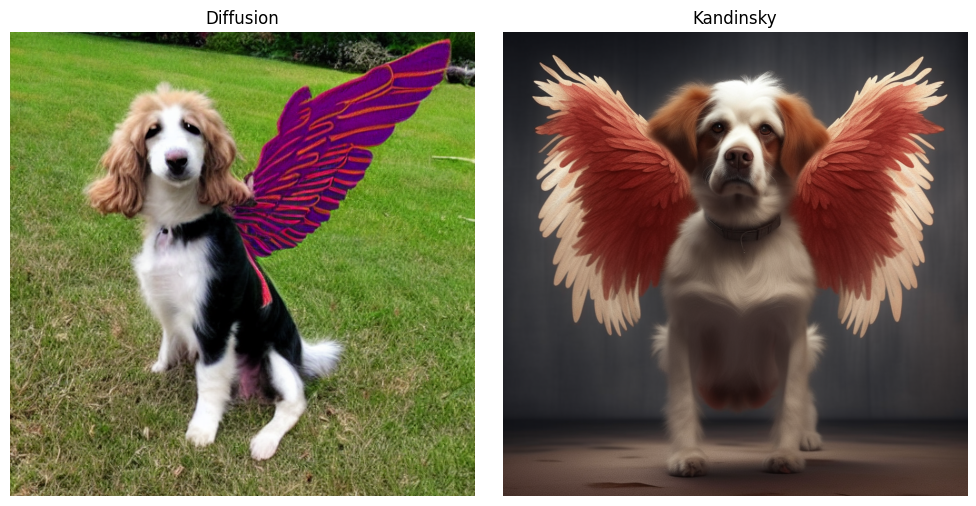

Dog wth wings


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

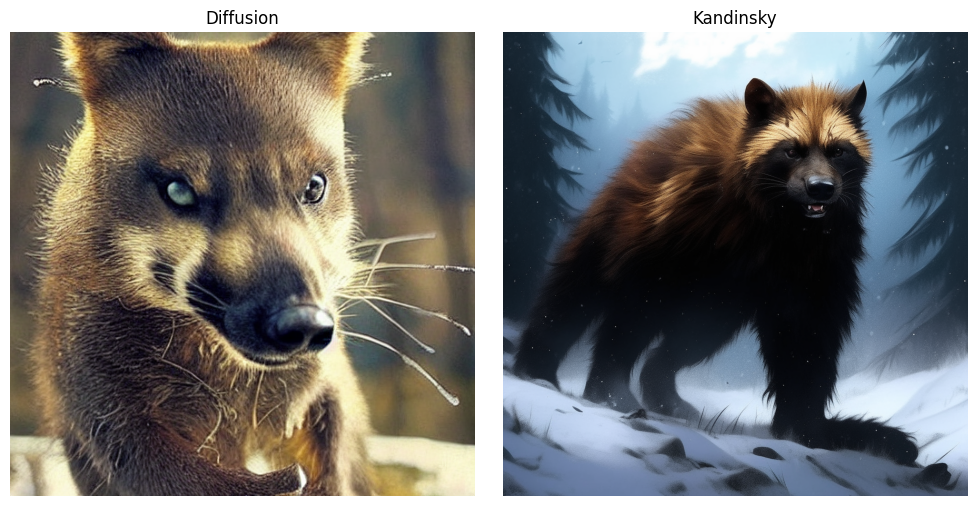

Wolverine animal from the north


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

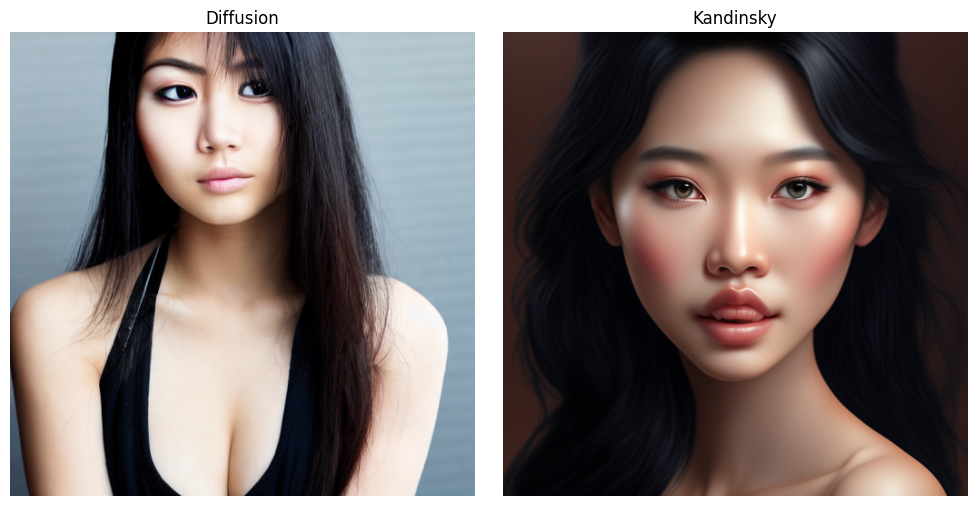

Beautiful Asian Woman with Black Eyes


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

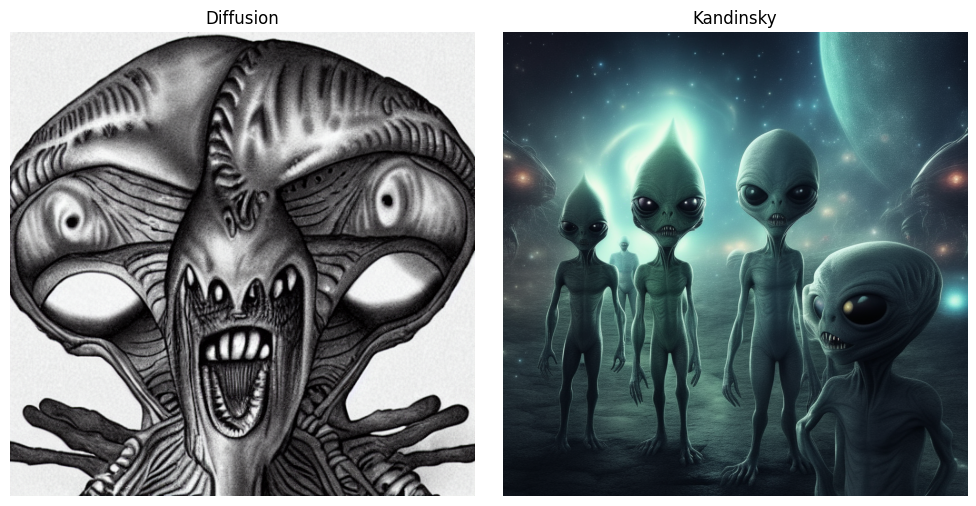

Aliens from the fourth dimension


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

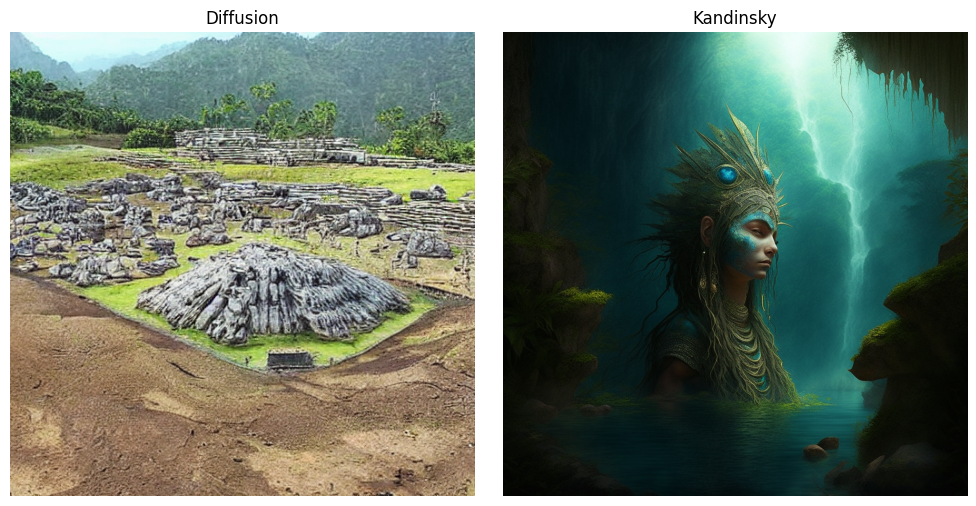

Lemurian in an ancient land


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

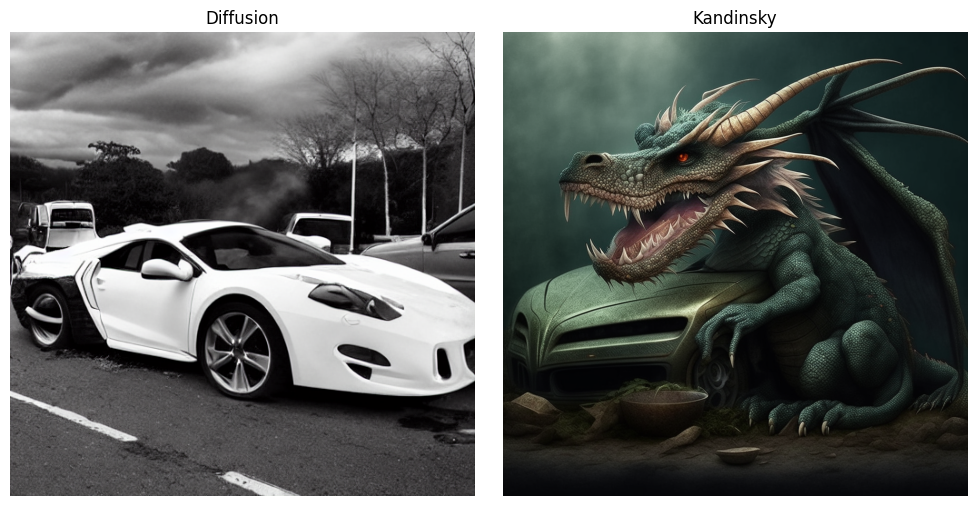

Beautiful Dragon Eating a Car


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

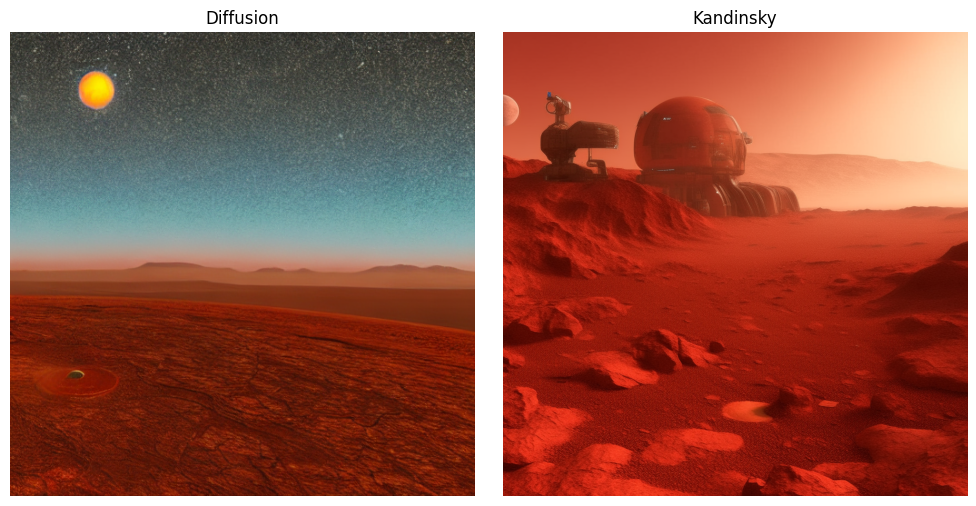

Summer Nights on Terraformed Mars


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

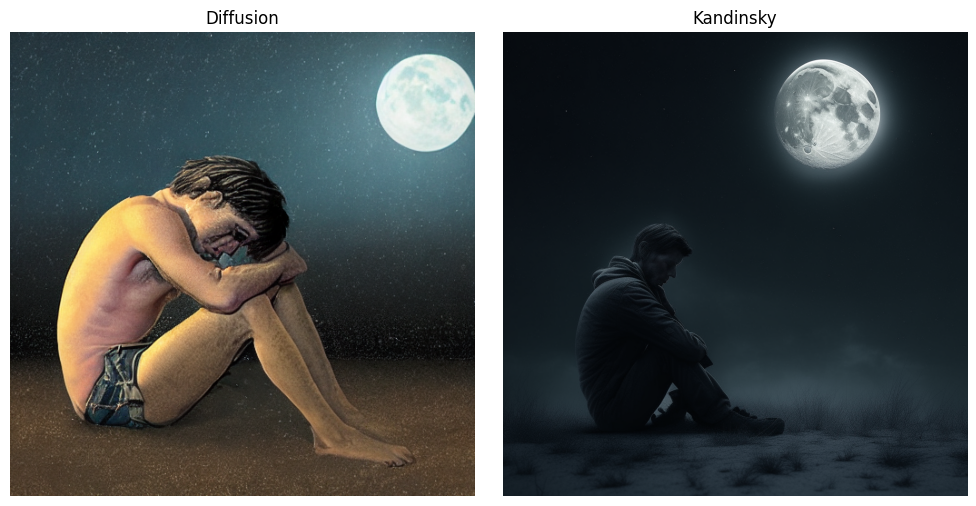

Sad man under the moonlight


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

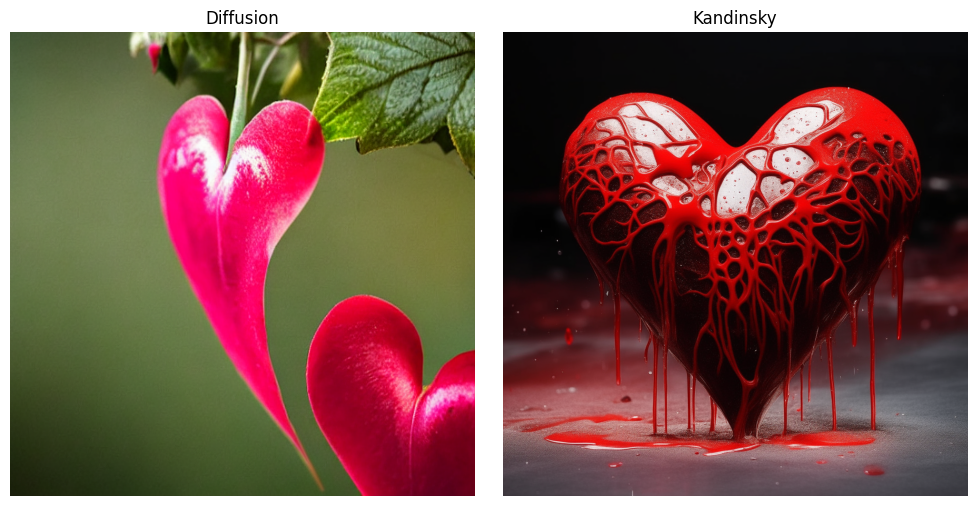

Bleeding heart in Las Vegas


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

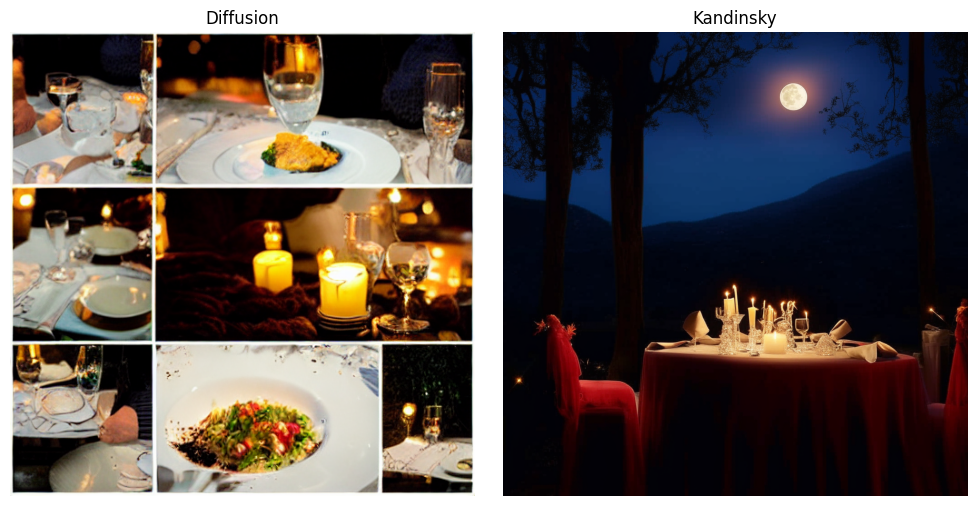

Soft Moonlight and a Romantic Dinner


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

prompt_array=[
    "Dog wth wings",
    "Wolverine animal from the north",
    "Beautiful Asian Woman with Black Eyes",
    "Aliens from the fourth dimension",
    "Lemurian in an ancient land",
    "Beautiful Dragon Eating a Car",
    "Summer Nights on Terraformed Mars",
    "Sad man under the moonlight",
    "Bleeding heart in Las Vegas",
    "Soft Moonlight and a Romantic Dinner"
    
]

for prompt in prompt_array:
    diffusion_image = diffusion_pipe(prompt).images[0]
    kandinsky_image = kandinsky3pipe(prompt).images[0]

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

    # Display the images
    axes[0].imshow(diffusion_image)
    axes[0].set_title("Diffusion")
    axes[0].axis('off')  # Hide axes

    axes[1].imshow(kandinsky_image)
    axes[1].set_title('Kandinsky')
    axes[1].axis('off')  # Hide axes

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()
    print(prompt)

